In [48]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [21]:
#importing dataset
train_ds = pd.read_csv("sentiment_train", delimiter='\t')
train_ds.head(2)

,sentiment,text
0,1,The Da Vinci Code book is just awesome.
1,1,"this was the first clive cussler i've ever read, but even books like Relic, and Da Vinci code were more plausible than this."


In [20]:
# first 5 positive sentiment
pd.set_option('max_colwidth', 800)
train_ds[train_ds.sentiment == 1][0:5]

,sentiment,text
0,1,The Da Vinci Code book is just awesome.
1,1,"this was the first clive cussler i've ever read, but even books like Relic, and Da Vinci code were more plausible than this."
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly didn't seem to hold it's own.


In [22]:
# first 5 neagative sentiment
pd.set_option('max_colwidth', 800)
train_ds[train_ds.sentiment == 0][0:5]

,sentiment,text
3943,0,da vinci code was a terrible movie.
3944,0,"Then again, the Da Vinci code is super shitty movie, and it made like 700 million."
3945,0,"The Da Vinci Code comes out tomorrow, which sucks."
3946,0,i thought the da vinci code movie was really boring.
3947,0,"God, Yahoo Games has this truly-awful looking Da Vinci Code-themed skin on it's chessboard right now."


In [23]:
#exploring the dataset
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6918 entries, 0 to 6917
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  6918 non-null   int64 
 1   text       6918 non-null   object
dtypes: int64(1), object(1)
memory usage: 108.2+ KB


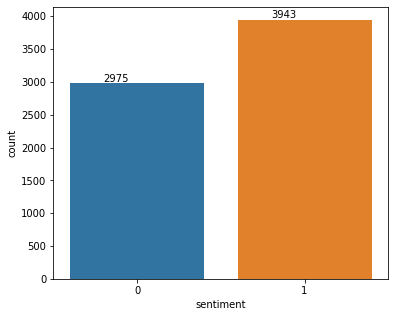

In [36]:
# Visualization
plt.figure(figsize=(6,5))

ax = sns.countplot(x='sentiment', data=train_ds)

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.2, 
                                 p.get_height()+30))

### Text Processing

In [84]:
# Create Count vectors for dataset

from sklearn.feature_extraction.text import CountVectorizer

#initialize the count vector
count_vectorizer = CountVectorizer(max_features=2000)

#create the dictionary from the corpus
feature_vector = count_vectorizer.fit(train_ds.text)

#get the feature names
features = feature_vector.get_feature_names()

print("Total no. of features: ", len(features))

Total no. of features:  2000


In [85]:
train_ds_features = count_vectorizer.transform(train_ds.text)
type(train_ds_features)
train_ds_features.shape

(6918, 2000)

In [86]:
#count how many sparse matrix or count of zero
train_ds_features.getnnz()

65266

In [87]:
print("Density of the matrix:", 100*train_ds_features.getnnz()/(train_ds_features.shape[0]*train_ds_features.shape[1]))

Density of the matrix: 0.47171147730557966


In [101]:
#convert the matrix to dataframe

train_ds_df=pd.DataFrame(train_ds_features.todense())

train_ds_df.columns = features



Index(['10', '17', '33', '6th', 'aaron', 'able', 'absolutely', 'absurd',
       'academy', 'acceptable',
       ...
       'year', 'yes', 'yesterday', 'yip', 'young', 'younger', 'yuck', 'yuh',
       'zach', 'zen'],
      dtype='object', length=1000)

Text(0, 0.5, 'Density')

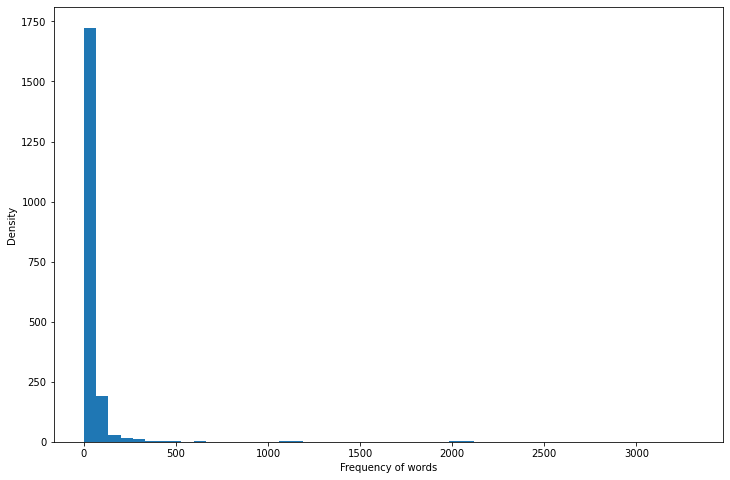

In [89]:
### Removing the Low frequency words

# summing up the occurances of featues columnwise in matrix (axis=0)

features_count = np.sum(train_ds_features.toarray(), axis=0)
features_count_df = pd.DataFrame(dict(features=features, counts=features_count))

plt.figure(figsize=(12,8))
plt.hist(features_count_df.counts, bins=50)
plt.xlabel("Frequency of words")
plt.ylabel("Density")

In [90]:
print(len(features_count_df[features_count_df.counts==1]))
print("=="*5)
print(len(features_count_df[features_count_df.counts==0]))

1096
0


In [94]:
features_count_df.sort_values('counts', ascending=False)[0:100]

,features,counts
1733,the,3306
93,and,2154
1335,potter,2093
808,harry,2093
355,code,2002
...,...,...
1394,read,113
138,at,110
1741,then,108
1487,saw,106


In [97]:
#Remove stop words
from sklearn.feature_extraction import text
my_stop_words = text.ENGLISH_STOP_WORDS
my_stop_words

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [98]:
my_stop_words = text.ENGLISH_STOP_WORDS.union(['harry','mountain'])

In [99]:
#create count vector
count_vectorizer = CountVectorizer(stop_words = my_stop_words, max_features = 1000)

feature_vector = count_vectorizer.fit(train_ds.text)
train_ds_features=count_vectorizer.transform(train_ds.text)

features = feature_vector.get_feature_names()
feature_counts=np.sum(train_ds_features.toarray(),axis=0) #columnwise features frequency

df = pd.DataFrame(dict(features = features, counts =feature_counts))
df.sort_values('counts', ascending=False)[0:50]

,features,counts
590,potter,2093
103,code,2002
141,da,2001
903,vinci,2001
72,brokeback,2000
409,love,1624
38,awesome,1127
437,mission,1094
342,impossible,1093
391,like,974


In [106]:
#stemming
from nltk.stem.snowball import PorterStemmer
stemmer = PorterStemmer()
analyzer = CountVectorizer().build_analyzer()

def stemmed_words(doc):
    stemmed_words = (stemmer.stem(w) for w in analyzer(doc))
    non_stop_words = [ word for word in list(set(stemmed_words)-set(my_stop_words))]
    return non_stop_words


In [109]:
count_vectorizer = CountVectorizer(analyzer=stemmed_words, max_features=1000)

feature_vector = count_vectorizer.fit(train_ds.text)
train_ds_features = count_vectorizer.transform(train_ds.text)  # features as independant variables will be used for modelling

features = feature_vector.get_feature_names()             # feature names will be as column names
features_count = np.sum(train_ds_features.toarray(), axis=0)

features_df = pd.DataFrame(dict(features = features, counts = features_count))

features_df.sort_values('counts', ascending = False)[0:50]

,features,counts
108,code,1984
915,vinci,1982
144,da,1982
80,brokeback,1930
299,harri,1916
555,potter,1916
409,love,1837
800,suck,1378
922,wa,1142
43,awesom,1116


In [110]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6918 entries, 0 to 6917
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  6918 non-null   int64 
 1   text       6918 non-null   object
dtypes: int64(1), object(1)
memory usage: 108.2+ KB


In [111]:
train_ds_df = pd.DataFrame(train_ds_features.todense())

train_ds_df.columns = features

train_ds_df['sentiment'] = train_ds.sentiment


In [112]:
#Naive Bayes model for sentiment classification

#split the dataset into train, test, split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_ds_features, train_ds.sentiment, train_size = 0.75, random_state = 42)

In [114]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5188, 1000)
(1730, 1000)
(5188,)
(1730,)


In [117]:
#model building
from sklearn.naive_bayes import BernoulliNB
nb_clf = BernoulliNB()
nb_clf.fit(X_train.toarray(),y_train)

BernoulliNB()

In [121]:
train_ds_prediction = nb_clf.predict(X_train.toarray())

test_ds_prediction = nb_clf.predict(X_test.toarray())

In [122]:
# evaluation parameters
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [124]:
print(classification_report(y_test,test_ds_prediction))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       738
           1       0.98      0.99      0.98       992

    accuracy                           0.98      1730
   macro avg       0.98      0.98      0.98      1730
weighted avg       0.98      0.98      0.98      1730



In [125]:
print(confusion_matrix(y_test,test_ds_prediction))

[[714  24]
 [ 13 979]]


In [126]:
print(accuracy_score(y_test,test_ds_prediction))

0.9786127167630058
